### S06 T01: Tasca dades, probabilitats i estadístiques

We´ll continue this exercise with the dataset from the athletes competing in the Olympic Games, both Winter and Summer Season (same dataset as previous exercise). This dataset is taken from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
import pandas as pd
import seaborn as sns
import random
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We have some repeated athletes in the dataframe but we will not delete these duplicates because some athletes compete in different categories and even in different Games, so it's normal that they can appear more than once.

+  **Exercici 1**

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

First, we will look at the dataset and we will **decide how to treat missing values.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df[['Age', 'Height', 'Weight']].describe().round(2)

,Age,Height,Weight
count,261642.00,210945.00,208241.00
mean,25.56,175.34,70.70
std,6.39,10.52,14.35
min,10.00,127.00,25.00
25%,21.00,168.00,60.00
50%,24.00,175.00,70.00
75%,28.00,183.00,79.00
max,97.00,226.00,214.00


Let´s look at the distribution of the attributes of the dataset that have missing values: **Age, Height and Weight.**

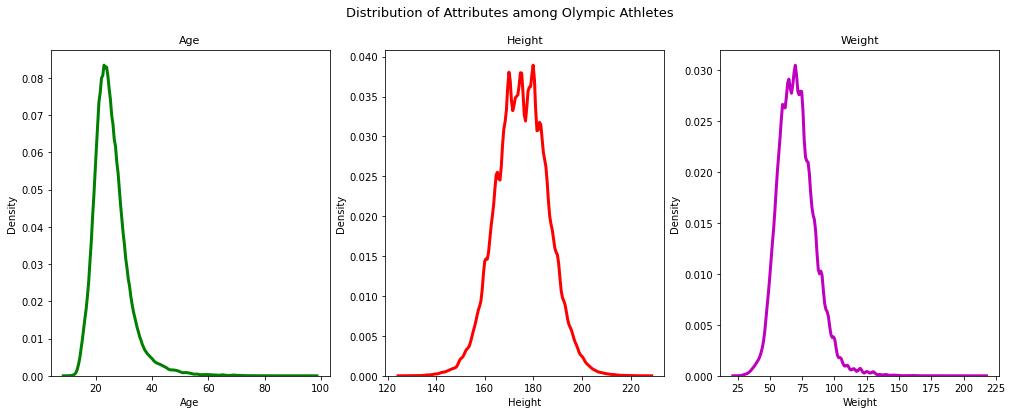

In [5]:
fig, axes = plt.subplots(1,3, figsize= (17,6))
fig.suptitle('Distribution of Attributes among Olympic Athletes', fontsize = 13)

sns.kdeplot(ax=axes[0], data= df, x="Age", color= 'g', linewidth = 3)
axes[0].set_title('Age', fontsize = 11)

sns.kdeplot(ax=axes[1], data= df, x="Height", color= 'r', linewidth = 3)
axes[1].set_title('Height', fontsize = 11)

sns.kdeplot(ax=axes[2], data= df, x="Weight", color= 'm', linewidth = 3)
axes[2].set_title('Weight', fontsize = 11)

plt.show()

Now we can substitute missing vales with other values and check if the attributes with the new values follow the same distribution as the original ones. 

For instance, we coud try to **fill missing values with random values based on the frequency they appear on the dataset.** We´ll assign a probability to each value and then randomnly assign it. We´ll do this for Age, Height and Weight:

In [6]:
df2 = df.copy()

# first we count the frequency each value appear in the dataset, we do this for age: 
dist_age = df2.Age.value_counts(normalize = True)
nan_age = df2['Age'].isnull()
np.random.seed(42)
# replace nan values with a random value according to their probability 
df2.loc[nan_age, 'Age'] = np.random.choice(dist_age.index, size = len(df2[nan_age]), p= dist_age.values)

In [7]:
# do the same for height
dist_height = df2.Height.value_counts(normalize = True)
nan_height = df2['Height'].isnull()
np.random.seed(42)
df2.loc[nan_height, 'Height'] = np.random.choice(dist_height.index, size = len(df2[nan_height]), p= dist_height.values)

In [8]:
# and lastly we do it for weight
dist_weight = df2.Weight.value_counts(normalize = True)
nan_weight = df2['Weight'].isnull()
np.random.seed(42)
df2.loc[nan_weight, 'Weight'] = np.random.choice(dist_weight.index, size = len(df2[nan_weight]), p= dist_weight.values)

In [9]:
# describe the dataframe with the new values: 
df2[['Age', 'Height', 'Weight']].describe().round(2)

,Age,Height,Weight
count,271116.00,271116.00,271116.00
mean,25.56,175.35,70.70
std,6.39,10.52,14.34
min,10.00,127.00,25.00
25%,21.00,168.00,60.00
50%,24.00,175.00,70.00
75%,28.00,183.00,79.00
max,97.00,226.00,214.00


It seems the statistics are the same, **let´s look again at the distribution after fillin nan values:**

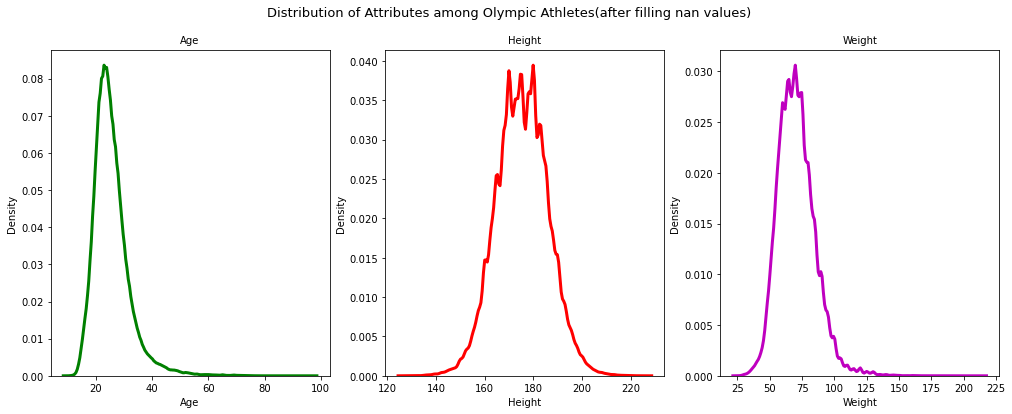

In [10]:
fig, axes = plt.subplots(1,3, figsize= (17,6))
fig.suptitle('Distribution of Attributes among Olympic Athletes(after filling nan values)', fontsize = 13)

sns.kdeplot(ax=axes[0], data= df2, x="Age", color= 'g', linewidth = 3)
axes[0].set_title('Age', fontsize = 10)

sns.kdeplot(ax=axes[1], data= df2, x="Height", color= 'r', linewidth = 3)
axes[1].set_title('Height', fontsize = 10)

sns.kdeplot(ax=axes[2], data= df2, x="Weight", color= 'm', linewidth = 3)
axes[2].set_title('Weight', fontsize = 10)

plt.show()

We can see the distribution and the statistics are the same as before, now we can continue and select an attribute to calculate mode, mean, median and standard deviation. We will **select in this case 'Age' attribute:**

In [11]:
mean = round(df2['Age'].mean(), 2)
std = round(df2['Age'].std(), 2)
median =  df2['Age'].median()
mode = df2['Age'].mode()[0]

print('For column  Age: ' + '\n' + 'mean: '+ str(mean) + '\n' + 'std deviation: ' + str(std)+ '\n'+ 
      'median: '+ str(median)+ '\n'+ 'mode: '+ str(mode))

For column  Age: 
mean: 25.56
std deviation: 6.39
median: 24.0
mode: 23.0


We can see these results are the same as the "describe" table above. In describe method we don't have the mode, but we can chek this result with the value_counts() method (mode is the most repeated value in the dataset): 

In [12]:
df2.Age.value_counts()

23.0    22697
24.0    22511
22.0    21565
25.0    20435
21.0    19851
        ...  
77.0        2
84.0        1
10.0        1
96.0        1
97.0        1
Name: Age, Length: 74, dtype: int64

Again we see the mode for "Age" attribute is 23. 

Doing a boxplot allows us to see the visualization: 

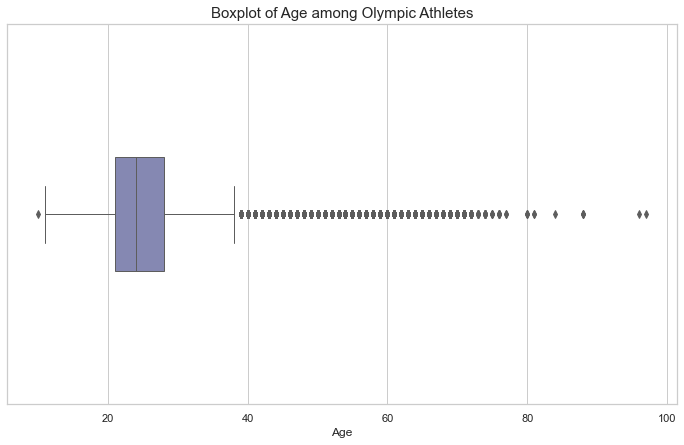

In [13]:
plt.figure(figsize=(12,7))
sns.set(style= "whitegrid")
sns.boxplot(x = df2['Age'], color = '#7d81ba', fliersize= 5, linewidth= 1, width = 0.3)
plt.title('Boxplot of Age among Olympic Athletes', fontsize = 15)
plt.show()

As we could observe in the distribution plot, 'Age' is quite concentrated between values 21 and 28 but we have some outliers. 

- **Exercici 2**

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 


In this case, we will select attributes **'Height' and 'Weight'** to look for their correlation:

In [14]:
correlation = df2['Height'].corr(df2['Weight'])
correlation

0.6087369151528671

We have a **positive correlation of 60,87%,** these two attributes are somewhat correlated but their correlation is not so strong.We have to take into acount we have a dataset of different Sports, we can see what happens if we choose a concrete Sport. For instance, we can calculate the same correlation but only for **"Basketball" athletes:**

In [15]:
df_basketball = df2[df2['Sport'] == 'Basketball']

correlation = df_basketball['Height'].corr(df_basketball['Weight'])
correlation

0.773932974586269

The correlation between these 2 variables is much higher in the case of Basketball!! 

If we want to see a graphic visualization of the correlation between "Height" and "Weight" we can do a scatterplot, we will diferenciate in this graph between male and female athletes: 

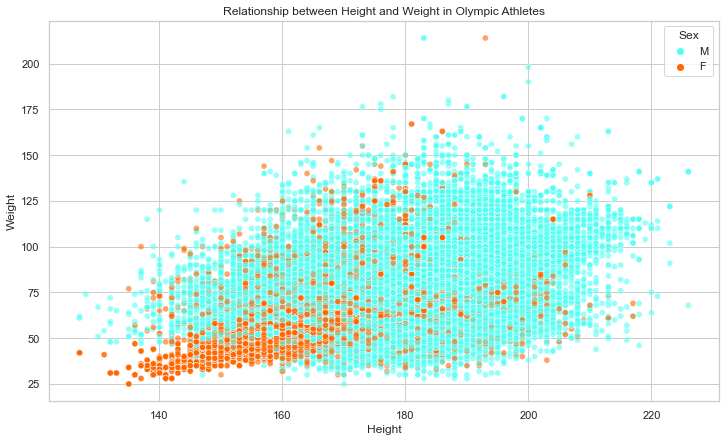

In [16]:
# we can do an scatterplot 
plt.figure(figsize=(12,7))
sns.scatterplot(x="Height", y="Weight", data=df2, hue= 'Sex', palette=['#4ffff4','#ff6600'], alpha = 0.6)
plt.title('Relationship between Height and Weight in Olympic Athletes')
plt.show()

+ **Exercici 3**

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.


For correlation we can use categorical values but we have to convert it first to numeric. 

In [17]:
# we create a new dataframe with only the columns we want: 
columns = ['Sex','Age', 'Height', 'Weight','Year', 'Season', 'Medal']
df3 = df2[columns]

In [18]:
# mapping sex
df3['Sex'] = df3['Sex'].map({'M': 0, 'F': 1}).astype(int)
    
# mapping Season
df3['Season'] = df3['Season'].map({'Winter' : 0, 'Summer': 1}).astype(int)

# create  column for medal or not medal 
medal_map = {np.nan: 0, 'Bronze': 1, 'Silver': 1, 'Gold': 1}
df3['Has_medal'] = df3['Medal'].map(medal_map)

In [19]:
# we will use dummies to create columns for each type of medal 
dummies = pd.get_dummies(df3.Medal)
dummies

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [20]:
# Concatenate the dummies to original dataframe
merged = pd.concat([df3, dummies], axis='columns')

In [21]:
# now we can drop the medal column
merged = merged.drop(['Medal'], axis='columns')

In [22]:
merged.describe().round(2)

,Sex,Age,Height,Weight,Year,Season,Has_medal,Bronze,Gold,Silver
count,271116.00,271116.00,271116.00,271116.00,271116.00,271116.00,271116.00,271116.00,271116.00,271116.00
mean,0.27,25.56,175.35,70.70,1978.38,0.82,0.15,0.05,0.05,0.05
std,0.45,6.39,10.52,14.34,29.88,0.38,0.35,0.22,0.22,0.21
min,0.00,10.00,127.00,25.00,1896.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,21.00,168.00,60.00,1960.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,24.00,175.00,70.00,1988.00,1.00,0.00,0.00,0.00,0.00
75%,1.00,28.00,183.00,79.00,2002.00,1.00,0.00,0.00,0.00,0.00
max,1.00,97.00,226.00,214.00,2016.00,1.00,1.00,1.00,1.00,1.00


In this statistics, we can see that of all athletes 15% have a medal, 5% Gold, 5% Silver and 5% Bronze. 
We can also see 27% of athletes are women and 82% of the athletes compete in Summer Games. 

We can use a "heatmap" to see the correlation of all the attributes: 

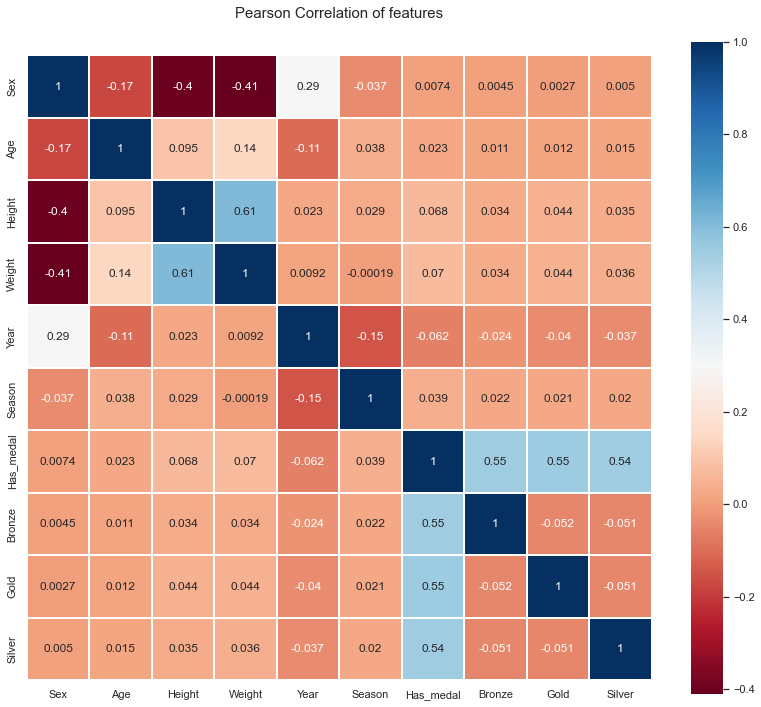

In [23]:
colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of features', y=1.05, size = 15)
sns.heatmap(merged.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True) # annot True gives us the values for the correlation
plt.show()

In general, we can see the attributes in the dataset are not so strongly correlated. We see that higher correlation relates to "Height" and "Weight" which we have already described previously. 

Besides, we can see some  negative correlation between Sex and Height and Weight, this tells us that female athletes tend to have lower Height and Weight (we defined female as 1 and male as 0). Also, we see a positive correlation of 0.29 between Sex and Year, altough a small relation, this may be explained because the female participation in the Games has been increasing through the years.  

If we want, we can also plot only the first half of the table (because the information is repeated in the graph): 

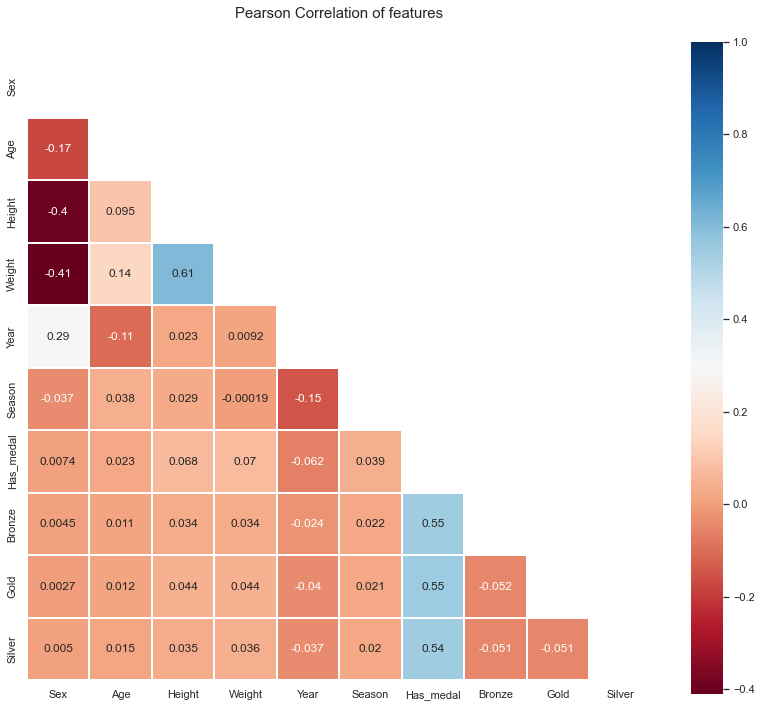

In [24]:
plt.figure(figsize = (14,12))
matrix = np.triu(merged.astype(float).corr())
plt.title('Pearson Correlation of features', y=1.05, size = 15)
sns.heatmap(merged.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True, mask= matrix)
plt.show()

This is the same graph as above but with no repeated info.

+ **Exercici 4**

Continuant amb les dades 
de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Before we calculated the statistic info on "Age" column, we wil do the same with the Geometric and Harmonic Mean and then we will compare them: 

In [25]:
# importing libraries
from scipy import stats
import scipy

In [26]:
age_geometric_mean = scipy.stats.gmean(df2.loc[:, 'Age'])
print('Age geometric mean is: ', round(age_geometric_mean, 2))
print('Age arithmetic mean is: ', round(df2.Age.mean(), 2))

Age geometric mean is:  24.87
Age arithmetic mean is:  25.56


We´ll do the same for harmonic mean: 

In [27]:
age_harmonic_mean = scipy.stats.hmean(df2.loc[:, 'Age'])
print('Age harmonic mean is: ', round(age_harmonic_mean, 2))
print('Age arithmetic mean is: ', round(df2.Age.mean(), 2))
print('Age geometric mean is: ', round(age_geometric_mean, 2))

Age harmonic mean is:  24.26
Age arithmetic mean is:  25.56
Age geometric mean is:  24.87


We can see the three means are similar but not equal. 